<a href="https://colab.research.google.com/github/evi03/KECERDASAN-BUATAN/blob/main/pizza_vs_ice_Cream_Evi%20Amalia%20Midfia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : EVI AMALIA MIDFIA**

**KELAS : TI-2C**

**ABSEN : 11**

**NIM : 2141720030**


**KLASIFIKASI PERBEDAAN GAMBAR PIZZA DENGAN ICE CREAM**

**referensi :** https://www.kaggle.com/code/hemendrasr/pizza-vs-ice-cream-quick-guide

**Sambungan ke drive**

In [ ]:
from google.colab import drive 
drive.mount('/content/drives')

Mounted at /content/drives


**import Library**

In [ ]:
#import berfungsi untuk multi file maksudnya yaitu kita dapat memanggil file lain di dalam satu module yang berbeda
#module adalah file yang berisikan sekumpulan fungsi, variabel, dan class yang disimpan dalam satu file berekstensi
import os 
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

print(tf.__version__)

2.9.2


**Load Data**

In [ ]:
#gunanya untuk memanggil dataSample yang sudah di upload pada gdrive
TRAIN_DIR = '../content/drives/MyDrive/Colab Notebooks/pizza-ice Cream/dataset/train'
VAL_DIR = '../content/drives/MyDrive/Colab Notebooks/pizza-ice Cream/dataset/valid'
TEST_DIR = '../content/drives/MyDrive/Colab Notebooks/pizza-ice Cream/dataset/test'

In [ ]:
#maksudnya akan mengambil 32 sampel pertama (1 sampai 32) dari dataset dan kemudian melatih jaringannya
BATCH_SIZE=32

In [ ]:
#proses Rescaling data menjadi 1/255 dari dataset train.
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

#sintesis data dari gambar yang sama dengan melakukan berbagai operasi seperti mengambil 32 sampel gambar dan mengatur ukuran;
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(417, 626),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 718 images belonging to 2 classes.


In [ ]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

val_generator = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(417, 626),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 208 images belonging to 2 classes.


In [ ]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(417, 626),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


**Data Visualization**

**Utils**

In [ ]:
#Rangkrangkaian proses menampilkan data dalam bentuk gambar
#membuat dataframe kosong untuk gambar
def plot_grid_images(images, labels, columns=5, image_size=None, figsize=(8, 8), cmap='gray', title=None, file_name=None):
    fig = plt.figure(figsize=figsize)
    fig.tight_layout(h_pad=3)
    rows = math.ceil(len(images)/columns)

    for image, label, position in zip(images, labels, range(1, len(labels)+1)):
        fig.add_subplot(rows, columns, position)
        if image_size is not None:
            image = image.reshape(image_size)
        plt.imshow(image, cmap=cmap, interpolation='nearest')
        plt.axis('off')
        plt.title(label)
    if title is not None:
        fig.suptitle(title, fontsize=14)

    if file_name is not None:
        plt.savefig(file_name)
    plt.show()
    return file_name

In [ ]:
#proses pengecekan klasifikasi gambar
def plot_images(generator):
    images_to_show = 20
    new_labels = []
    key_mappings = {}
    for label, key in val_generator.class_indices.items():
        key_mappings[key] = label
    
    for images, labels in generator:
        new_labels = [key_mappings[label] for label in labels]
        plot_grid_images(images[:images_to_show], new_labels[:images_to_show], figsize=(14, 10))
        break

**Train Images**

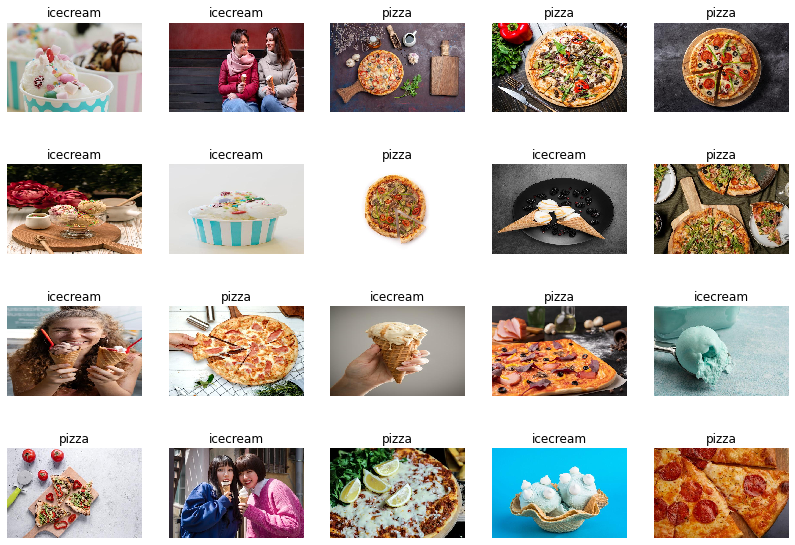

In [ ]:
#memvalidasi gambar dari dataset train
plot_images(train_generator)

**validasi image**

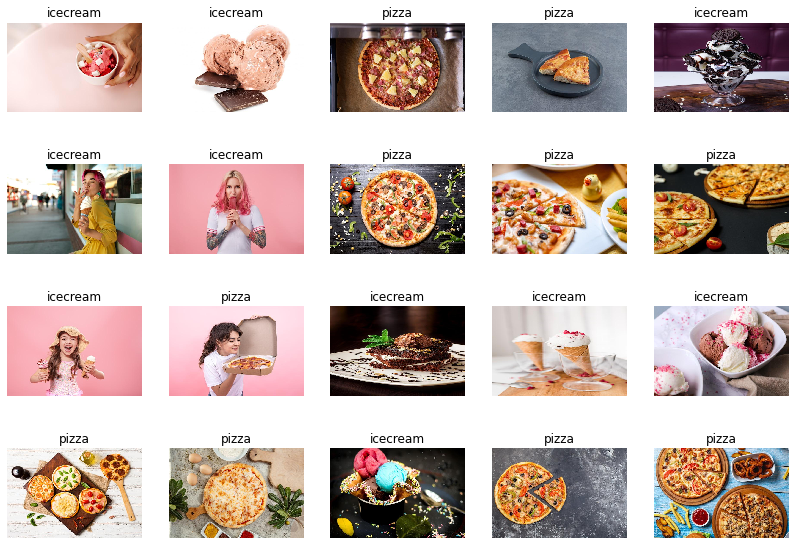

In [ ]:
#memvalidasi gambar dari dataset validasi
plot_images(val_generator)

**test image**

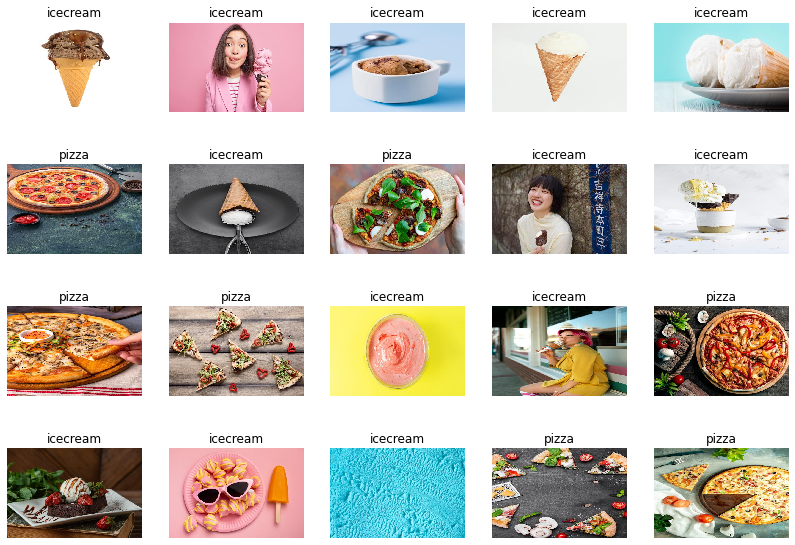

In [ ]:
##memvalidasi ulang gambar dari dataset test
plot_images(test_generator)

**model**

In [ ]:
#proses akurasi 
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(417, 626, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(417, 626, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 415, 624, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 207, 312, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 205, 310, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 102, 155, 128)    0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2023680)           0         
                                                                 
 dense (Dense)               (None, 1)                 2

**model train**

In [ ]:
#mengecek akurasi foto dari dataset train dan validasi
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_steps=len(val_generator),
    validation_data=val_generator
)

Epoch 1/10
23/23 [==============================] - 764s 33s/step - loss: 2.9683 - accuracy: 0.6017 - val_loss: 0.5978 - val_accuracy: 0.6490
Epoch 2/10
23/23 [==============================] - 663s 29s/step - loss: 0.4644 - accuracy: 0.8120 - val_loss: 0.3726 - val_accuracy: 0.8558
Epoch 3/10
23/23 [==============================] - 671s 29s/step - loss: 0.2934 - accuracy: 0.8914 - val_loss: 0.3500 - val_accuracy: 0.8269
Epoch 4/10
23/23 [==============================] - 669s 29s/step - loss: 0.1767 - accuracy: 0.9331 - val_loss: 0.3165 - val_accuracy: 0.8654
Epoch 5/10
23/23 [==============================] - 669s 29s/step - loss: 0.1166 - accuracy: 0.9624 - val_loss: 0.3364 - val_accuracy: 0.8654
Epoch 6/10
23/23 [==============================] - 698s 30s/step - loss: 0.0789 - accuracy: 0.9763 - val_loss: 0.3656 - val_accuracy: 0.8846
Epoch 7/10
23/23 [==============================] - 668s 29s/step - loss: 0.0353 - accuracy: 0.9930 - val_loss: 0.4645 - val_accuracy: 0.8413
Epoch 

**Model Evaluation**

In [ ]:
#mengecek akurasi foto dari dataset test

4/4 [==============================] - 26s 6s/step - loss: 0.2144 - accuracy: 0.8868


[0.21436120569705963, 0.8867924809455872]